In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
cd 'drive'

/content/drive


In [6]:
cd 'My Drive/Spotle AI'

/content/drive/My Drive/Spotle AI


In [11]:
!pip install fastai

In [14]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

In [19]:
np.random.seed(42)
data = ImageDataBunch.from_folder('Data', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=(48,48), 
                                  num_workers=4)

In [20]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (8654 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
Fear,Fear,Fear,Fear,Fear
Path: Data;

Valid: LabelList (2163 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
Fear,Sad,Happy,Fear,Fear
Path: Data;

Test: None

In [22]:
learner = create_cnn(data, models.vgg19_bn, metrics=[accuracy], callback_fns=ShowGraph)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


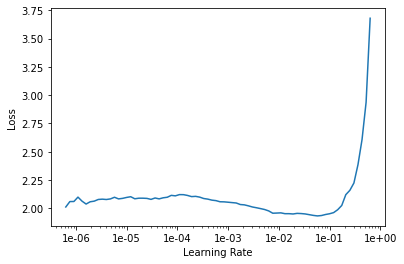

In [23]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.482075,1.202554,0.502543,08:55
1,1.127250,1.221826,0.530744,00:24
2,0.976874,0.845673,0.617661,00:24
3,0.817622,0.744497,0.672215,00:24
4,0.739348,0.693268,0.691632,00:24
5,0.697377,0.651766,0.711512,00:24
6,0.663094,0.640865,0.724919,00:24
7,0.624184,0.627230,0.723994,00:24
8,0.611969,0.623918,0.723994,00:24
9,0.600346,0.614451,0.731854,00:24


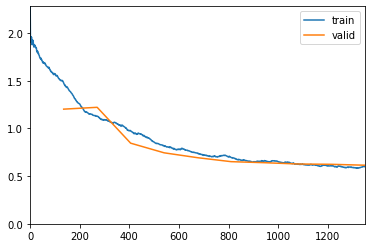

In [24]:
learner.fit_one_cycle(10, max_lr=slice(1e-3, 1e-2))

In [26]:
interp = ClassificationInterpretation.from_learner(learner)

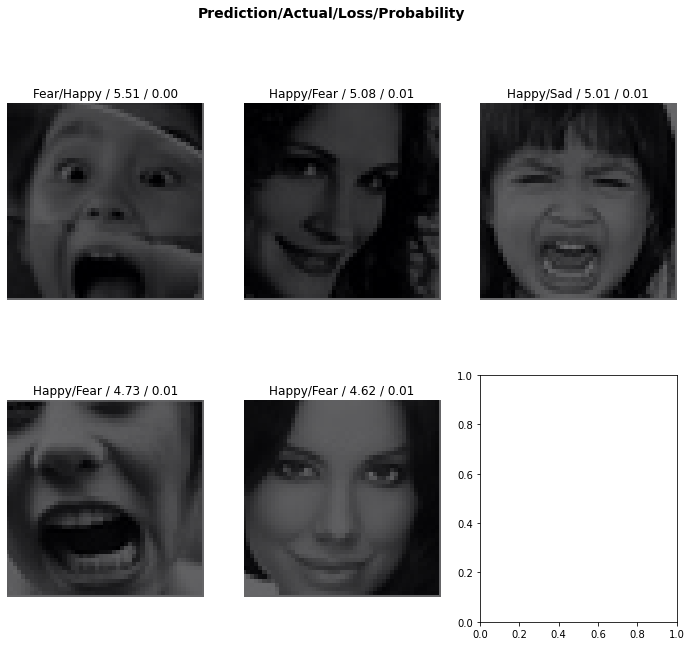

In [27]:

interp.plot_top_losses(5, figsize=(12,10), heatmap = True)

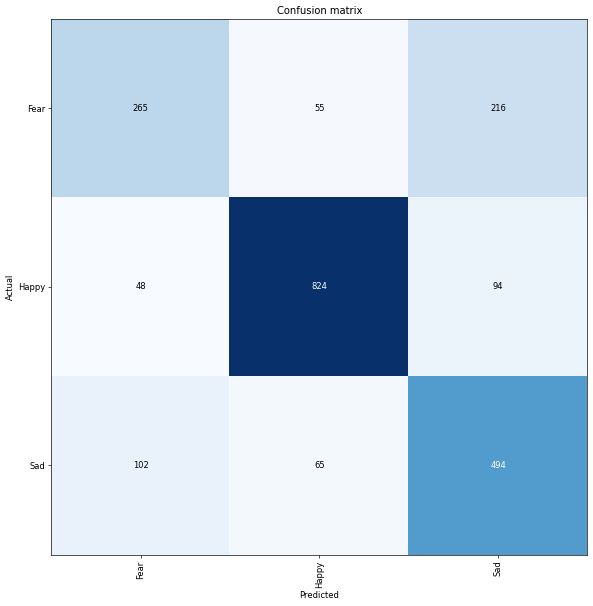

In [28]:
interp.plot_confusion_matrix(figsize=(12,10), dpi=60)

In [29]:
interp.most_confused(min_val = 5)

[('Fear', 'Sad', 216),
 ('Sad', 'Fear', 102),
 ('Happy', 'Sad', 94),
 ('Sad', 'Happy', 65),
 ('Fear', 'Happy', 55),
 ('Happy', 'Fear', 48)]

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 6.31E-06


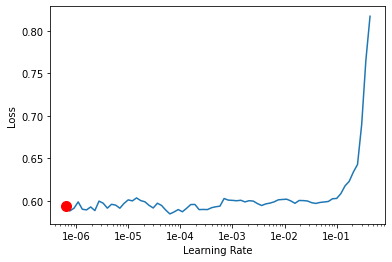

In [30]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,0.596986,0.614378,0.732316,00:25
1,0.593740,0.591571,0.743874,00:25
2,0.578314,0.584617,0.742950,00:25
3,0.547093,0.582400,0.741100,00:25
4,0.533534,0.579934,0.741100,00:25


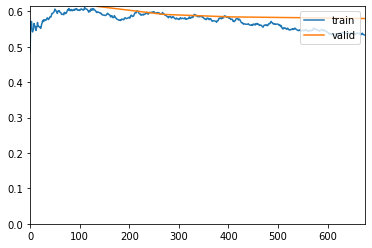

In [31]:
learner.unfreeze()
learner.fit_one_cycle(5, max_lr = slice(1e-6,1e-4))

In [32]:
interp = ClassificationInterpretation.from_learner(learner)

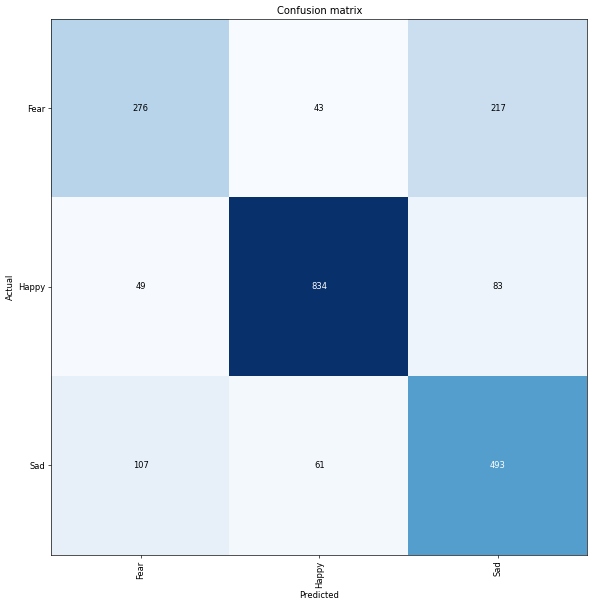

In [33]:
interp.plot_confusion_matrix(figsize = (12,10), dpi = 60)

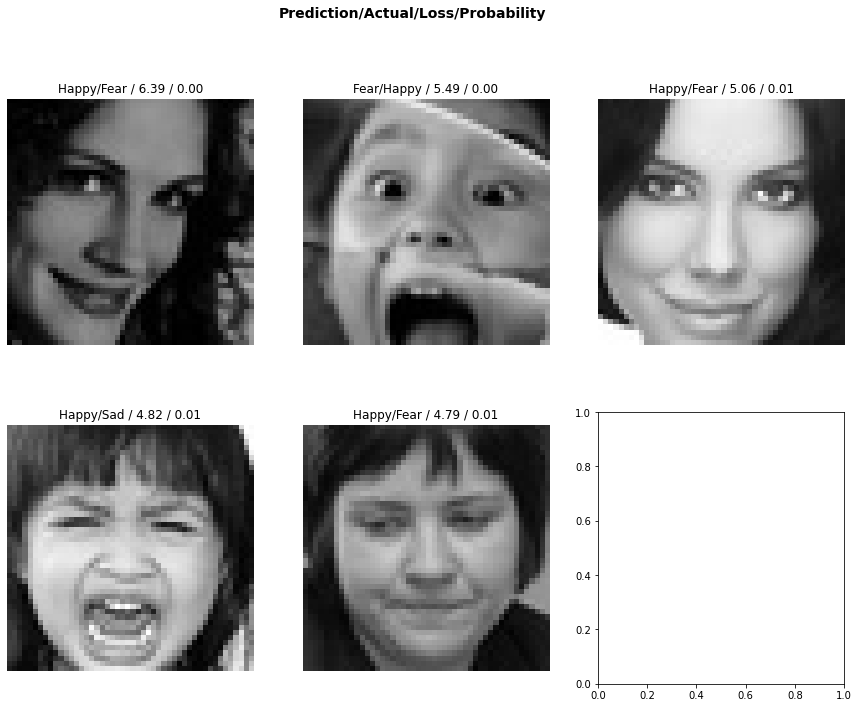

In [34]:
interp.plot_top_losses(5, figsize = (15,11))

In [35]:
interp.most_confused(5)

[('Fear', 'Sad', 217),
 ('Sad', 'Fear', 107),
 ('Happy', 'Sad', 83),
 ('Sad', 'Happy', 61),
 ('Happy', 'Fear', 49),
 ('Fear', 'Happy', 43)]